In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_ds="D:/CAPSTONE/dataset/data_train"
test_ds="D:/CAPSTONE/dataset/data_test"
validation_ds="D:/CAPSTONE/dataset/data_valid"

In [4]:
os.listdir('D:/CAPSTONE/dataset/data_train')

['Eksponen', 'integral', 'Logaritma', 'pertidaksamaan', 'spldv']

In [4]:
batch_size=32
img_size=224

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 500 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [1]:
train_generator[0][0].shape

NameError: name 'train_generator' is not defined

In [8]:
img= train_generator[0]
print(img)

(array([[[[0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         ...,
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065]],

        [[0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         ...,
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065]],

        [[0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         ...,
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065]],

        ...,

        [[0.97647065, 0.97647065, 0.97647065],
         [0.97647065, 0.97647065, 0.97647065

In [7]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [10]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the targe

(32, 224, 224, 3)
(32, 5)


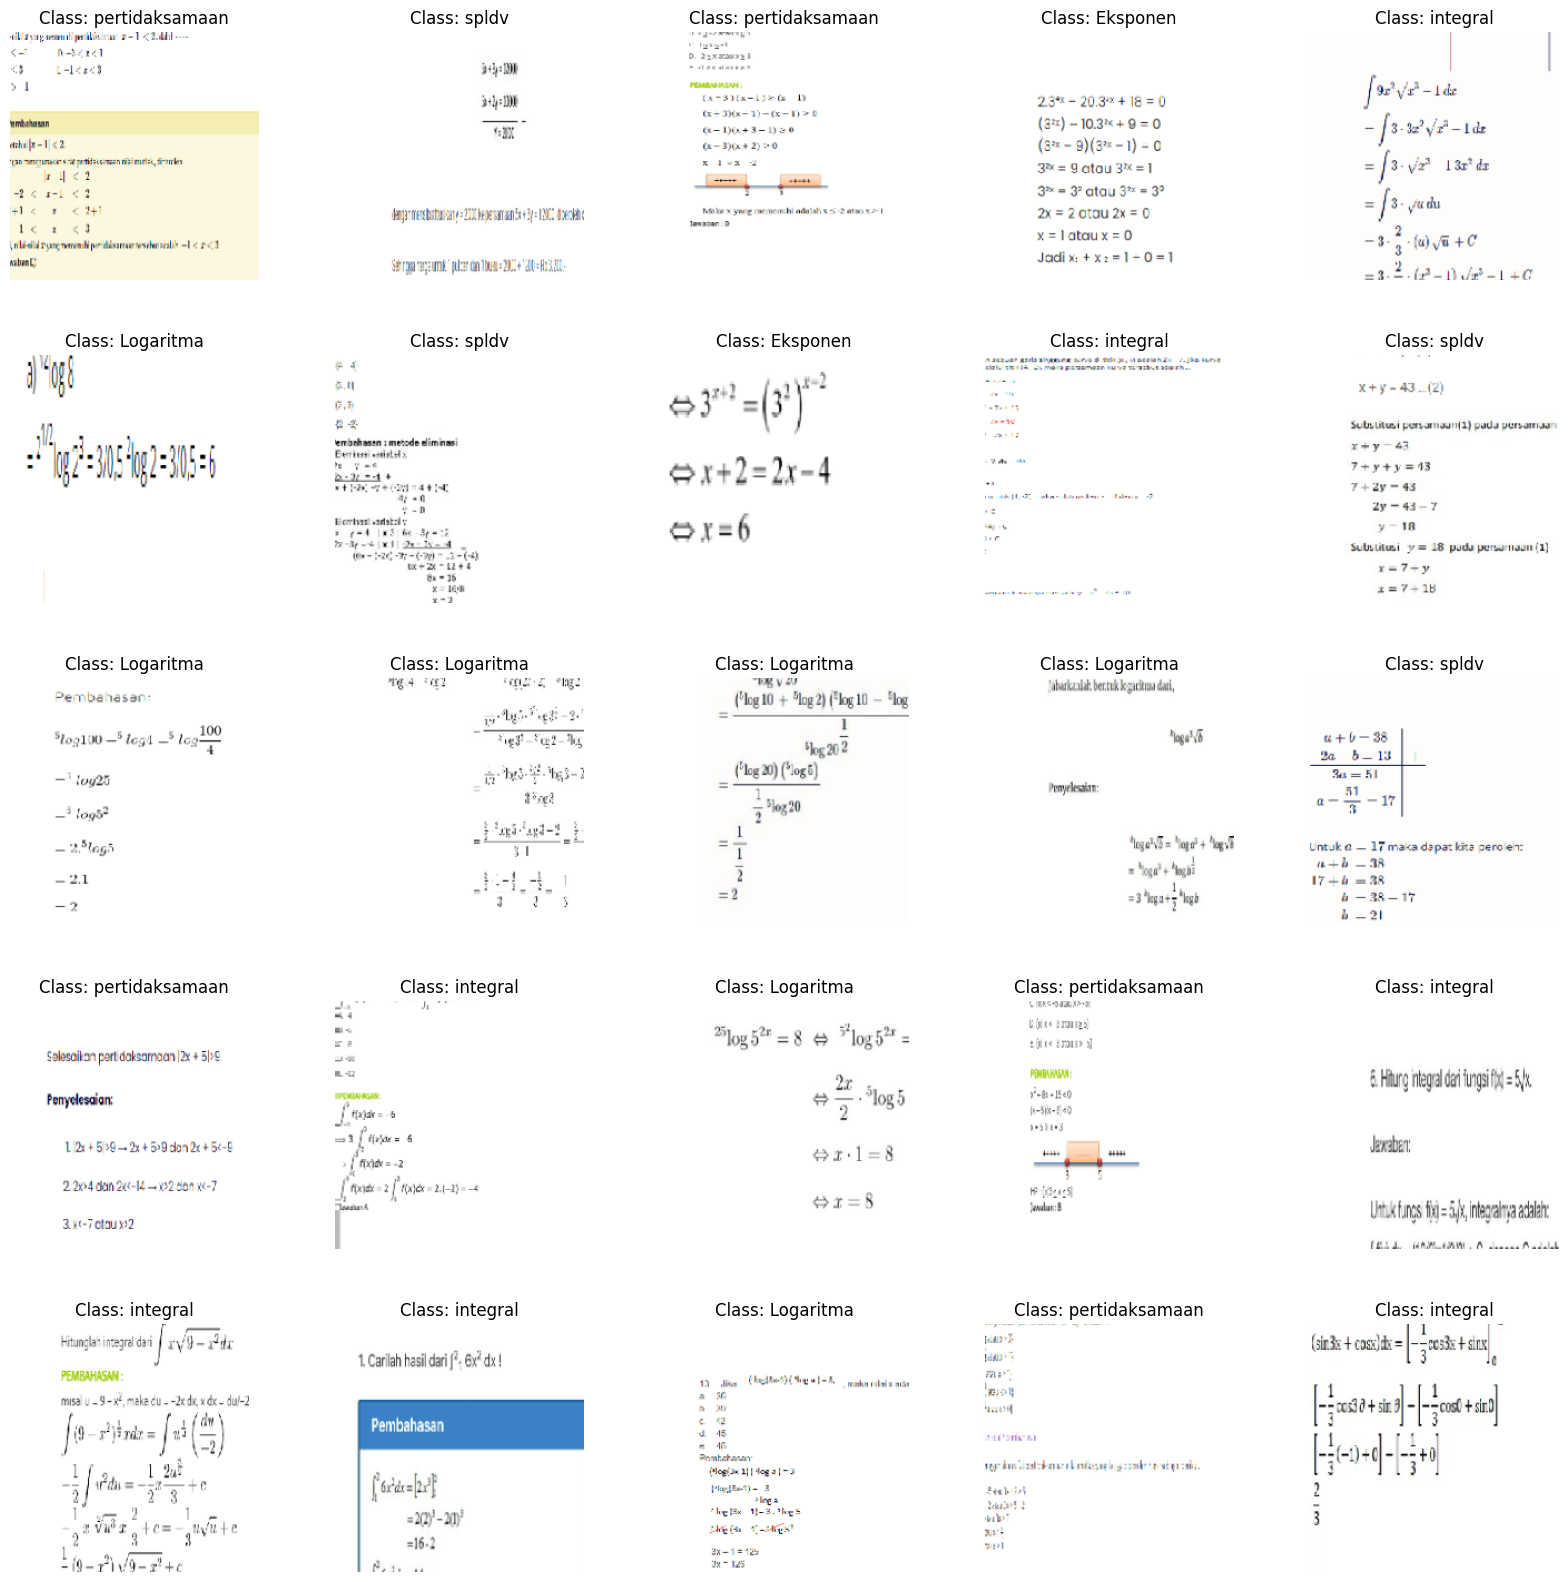

In [11]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize=(20, 20))  # Ubah ukuran gambar menjadi lebih besar

for i in range(25):  
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

plt.show()  # Tambahkan perintah untuk menampilkan gambar


In [8]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

16
29
30


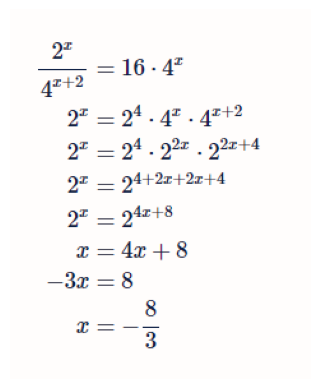

In [20]:
import matplotlib.pyplot as plt
from PIL import Image

# Path ke gambar
image_path = "D:/CAPSTONE/dataset/data_train/Eksponen/1.png"

# Memuat gambar menggunakan PIL
img = Image.open(image_path)

# Menampilkan gambar menggunakan matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()


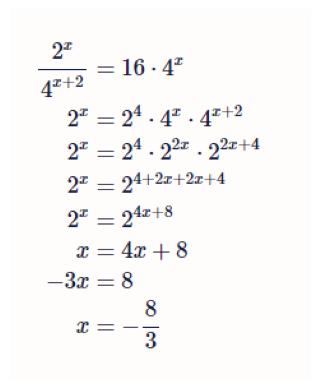

In [22]:
img = Image.open(image_path)
img = img.convert("RGB")  # Convert the image to RGB mode

# Convert the image to a NumPy array
img_array = np.array(img)

# Normalize the image array
img_array = img_array / 255.0

# Display the image
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [12]:
from keras.layers import MaxPool2D

In [13]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [14]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [15]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [17]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [23]:
history =model.fit(train_generator, validation_data=test_generator, epochs=100)

TypeError: __array__() takes 1 positional argument but 2 were given

In [21]:
n_categories = len(os.listdir('D:/CAPSTONE/dataset/data_valid'))# number of categories print(n_categories)

In [22]:
n_categories

5

In [23]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.610052,0.174,1.609243,0.20
1,1.609429,0.200,1.608922,0.20
2,1.609281,0.210,1.608450,0.46
3,1.609330,0.186,1.608181,0.20
4,1.609160,0.208,1.606336,0.46


In [24]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Mendapatkan prediksi dari model
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Mendapatkan label asli dari generator
y_true = test_generator.classes

# Menghitung matriks konfusi
confusion = confusion_matrix(y_true, y_pred)

# Menampilkan matriks konfusi
print("Confusion Matrix:")
print(confusion)

2/2 [==============================] - 0s 116ms/step
Confusion Matrix:
[[ 6  2  1  0  1]
 [ 1  9  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0 10]]


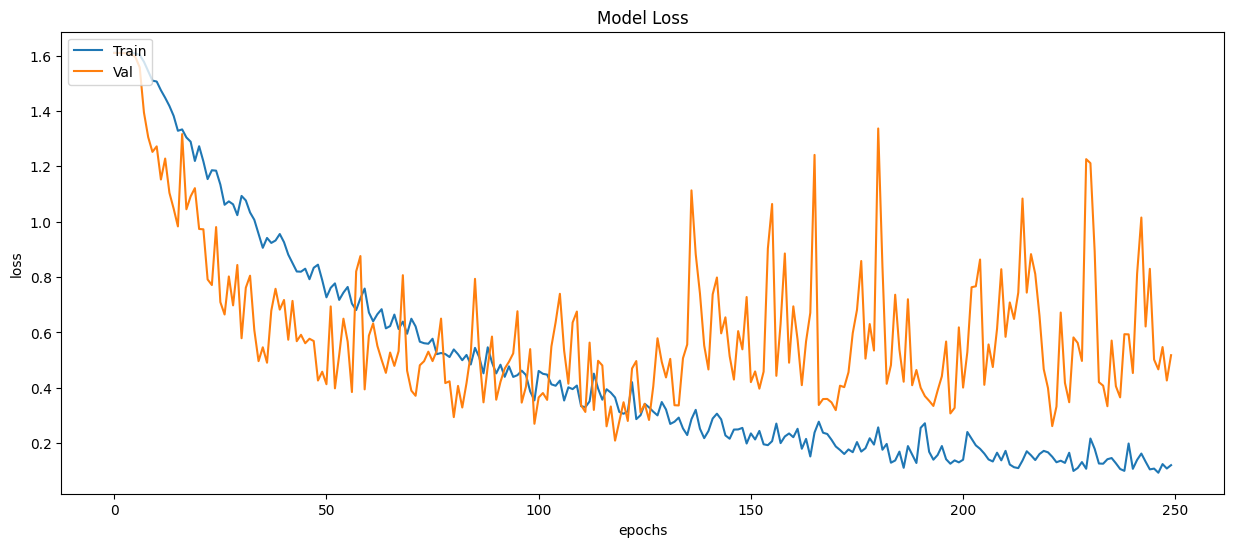

In [25]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

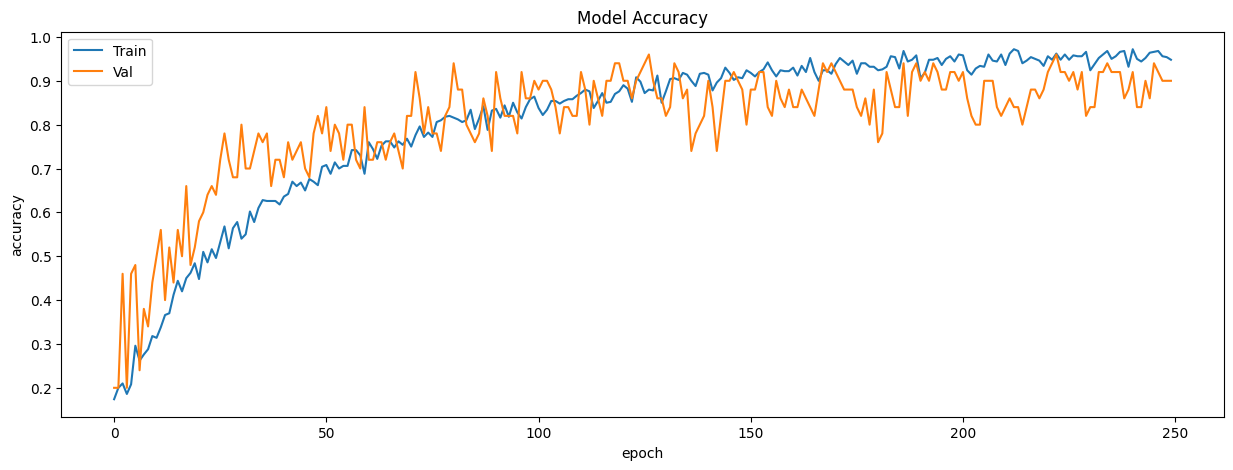

In [26]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [27]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

2/2 [==============================] - 0s 114ms/step


In [28]:
results =model.evaluate(test_generator)

2/2 [==============================] - 0s 102ms/step - loss: 0.5178 - accuracy: 0.9000


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.82      0.90      0.86        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.89        50
weighted avg       0.90      0.90      0.89        50



In [30]:
# Evaluasi model pada dataset validasi
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Loss on Validation Set:", val_loss)
print("Accuracy on Validation Set:", val_accuracy)


2/2 [==============================] - 10s 10s/step - loss: 5.2385 - accuracy: 0.6000
Loss on Validation Set: 5.238528251647949
Accuracy on Validation Set: 0.6000000238418579


In [31]:
# Simpan model ke file .h5
model.save('train_modeling.h5')


In [32]:
!dir


drive  sample_data  train_modeling.h5


1/1 [==============================] - 0s 147ms/step


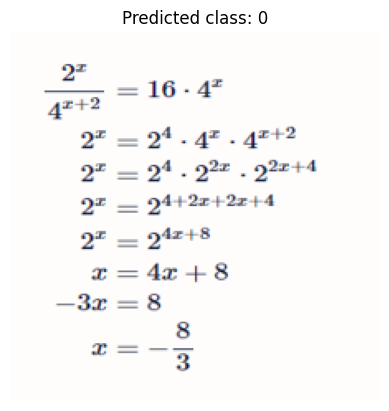

In [55]:
from tensorflow.keras.models import load_model
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Load saved model
model = load_model('D:/CAPSTONE/train_modeling.h5')

image_directory = 'D:/CAPSTONE/dataset/data_valid/Eksponen'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    if filename.endswith('.txt'):
        continue  # Mengabaikan file dengan ekstensi .txt
    path = os.path.join(image_directory, filename)
    try:
        img = Image.open(path)
        img = img.resize((img_size, img_size))
        images.append(img)
    except (UnidentifiedImageError, OSError):
        continue  # Mengabaikan file yang tidak dapat diidentifikasi atau dibuka

images = np.array([np.array(img) for img in images])
images = images / 255.0

# Menghapus saluran warna tambahan jika ada
images = images[..., :3]

# Melakukan prediksi dan visualisasi seperti sebelumnya
predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()



In [56]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.png : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.png : Eksponen
Class probability: 0.9999994
Predicted class for 2.png : Eksponen
Class probability: 0.9453395
Predicted class for 3.png : Eksponen
Class probability: 0.9993703
Predicted class for 4.png : Eksponen
Class probability: 0.99995995
Predicted class for 5.png : Eksponen
Class probability: 0.9994081
Predicted class for 6.png : Eksponen
Class probability: 0.99999475
Predicted class for 7.png : Eksponen
Class probability: 0.9999999
Predicted class for 8.png : Eksponen
Class probability: 0.9999982
Predicted class for 9.png : Eksponen
Class probability: 0.999292
Predicted class for 10.png : Eksponen
Class probability: 0.9998623


1/1 [==============================] - 0s 261ms/step


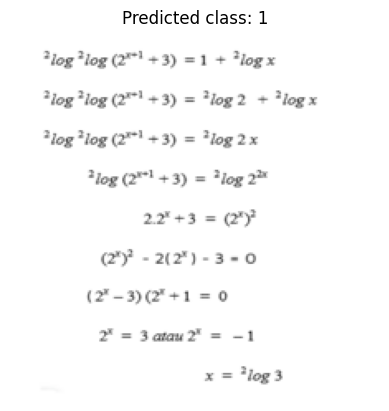

In [57]:
from tensorflow.keras.models import load_model
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Load saved model
model = load_model('D:/CAPSTONE/train_modeling.h5')

image_directory = 'D:/CAPSTONE/dataset/data_valid/Logaritma'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    if filename.endswith('.txt'):
        continue  # Mengabaikan file dengan ekstensi .txt
    path = os.path.join(image_directory, filename)
    try:
        img = Image.open(path)
        img = img.resize((img_size, img_size))
        images.append(img)
    except (UnidentifiedImageError, OSError):
        continue  # Mengabaikan file yang tidak dapat diidentifikasi atau dibuka

images = np.array([np.array(img) for img in images])
images = images / 255.0

# Menghapus saluran warna tambahan jika ada
images = images[..., :3]

# Melakukan prediksi dan visualisasi seperti sebelumnya
predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()



In [58]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.png : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.png : Logaritma
Class probability: 0.989077
Predicted class for 2.png : Logaritma
Class probability: 0.9976445
Predicted class for 3.png : Logaritma
Class probability: 0.9981002
Predicted class for 4.png : Logaritma
Class probability: 0.9120974
Predicted class for 5.png : Logaritma
Class probability: 0.99892884
Predicted class for 6.png : Logaritma
Class probability: 0.99320763
Predicted class for 7.png : Logaritma
Class probability: 0.9984267
Predicted class for 8.png : Logaritma
Class probability: 1.0
Predicted class for 9.png : Logaritma
Class probability: 0.99998224
Predicted class for 10.png : Logaritma
Class probability: 1.0


1/1 [==============================] - 0s 145ms/step


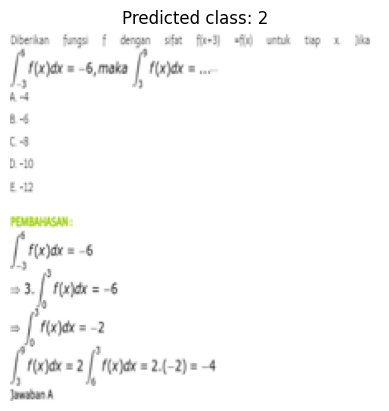

In [42]:
from tensorflow.keras.models import load_model
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Load saved model
model = load_model('D:/CAPSTONE/train_modeling.h5')

image_directory = 'D:/CAPSTONE/dataset/data_valid/Integral'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    if filename.endswith('.txt'):
        continue  # Mengabaikan file dengan ekstensi .txt
    path = os.path.join(image_directory, filename)
    try:
        img = Image.open(path)
        img = img.resize((img_size, img_size))
        images.append(img)
    except (UnidentifiedImageError, OSError):
        continue  # Mengabaikan file yang tidak dapat diidentifikasi atau dibuka

images = np.array([np.array(img) for img in images])
images = images / 255.0

# Menghapus saluran warna tambahan jika ada
images = images[..., :3]

# Melakukan prediksi dan visualisasi seperti sebelumnya
predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()



In [43]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.png : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.png : integral
Class probability: 0.999889
Predicted class for 2.png : integral
Class probability: 0.9998548
Predicted class for 3.png : integral
Class probability: 0.9872066
Predicted class for 4.png : integral
Class probability: 0.9997713
Predicted class for 5.png : integral
Class probability: 0.99793553
Predicted class for 6.png : integral
Class probability: 0.99280894
Predicted class for 7.png : integral
Class probability: 0.9996991
Predicted class for 8.png : integral
Class probability: 0.99999547
Predicted class for 9.png : integral
Class probability: 0.9996948
Predicted class for 10.png : integral
Class probability: 0.9999927


1/1 [==============================] - 0s 140ms/step


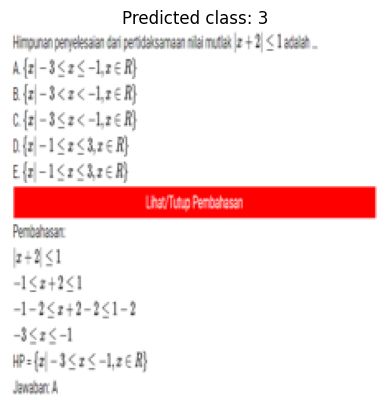

In [44]:
from tensorflow.keras.models import load_model
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Load saved model
model = load_model('D:/CAPSTONE/dataset/train_modeling.h5')

image_directory = 'D:/CAPSTONE/dataset/data_valid/persamaan'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    if filename.endswith('.txt'):
        continue  # Mengabaikan file dengan ekstensi .txt
    path = os.path.join(image_directory, filename)
    try:
        img = Image.open(path)
        img = img.resize((img_size, img_size))
        images.append(img)
    except (UnidentifiedImageError, OSError):
        continue  # Mengabaikan file yang tidak dapat diidentifikasi atau dibuka

images = np.array([np.array(img) for img in images])
images = images / 255.0

# Menghapus saluran warna tambahan jika ada
images = images[..., :3]

# Melakukan prediksi dan visualisasi seperti sebelumnya
predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [45]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.png : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.png : pertidaksamaan
Class probability: 1.0
Predicted class for 2.png : pertidaksamaan
Class probability: 1.0
Predicted class for 3.png : pertidaksamaan
Class probability: 1.0
Predicted class for 4.png : pertidaksamaan
Class probability: 1.0
Predicted class for 5.png : pertidaksamaan
Class probability: 1.0
Predicted class for 6.png : pertidaksamaan
Class probability: 1.0
Predicted class for 7.png : pertidaksamaan
Class probability: 1.0
Predicted class for 8.png : pertidaksamaan
Class probability: 1.0
Predicted class for 9.png : pertidaksamaan
Class probability: 1.0
Predicted class for 10.png : pertidaksamaan
Class probability: 1.0


1/1 [==============================] - 0s 138ms/step


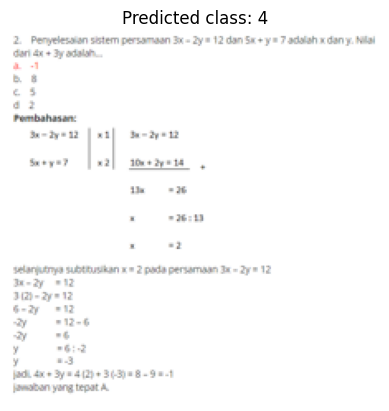

In [46]:
from tensorflow.keras.models import load_model
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Load saved model
model = load_model('/content/drive/My Drive/train_modeling.h5')

image_directory = '/content/drive/My Drive/dataset/data_valid/slpdv'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    if filename.endswith('.txt'):
        continue  # Mengabaikan file dengan ekstensi .txt
    path = os.path.join(image_directory, filename)
    try:
        img = Image.open(path)
        img = img.resize((img_size, img_size))
        images.append(img)
    except (UnidentifiedImageError, OSError):
        continue  # Mengabaikan file yang tidak dapat diidentifikasi atau dibuka

images = np.array([np.array(img) for img in images])
images = images / 255.0

# Menghapus saluran warna tambahan jika ada
images = images[..., :3]

# Melakukan prediksi dan visualisasi seperti sebelumnya
predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()



In [47]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.png : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.png : spldv
Class probability: 0.9995307
Predicted class for 2.png : spldv
Class probability: 0.9995578
Predicted class for 3.png : spldv
Class probability: 0.9996147
Predicted class for 4.png : spldv
Class probability: 0.9977228
Predicted class for 5.png : spldv
Class probability: 0.99963677
Predicted class for 6.png : spldv
Class probability: 0.9981135
Predicted class for 7.png : spldv
Class probability: 0.9729538
Predicted class for 8.png : spldv
Class probability: 0.9998658
Predicted class for 9.png : spldv
Class probability: 0.9999944
Predicted class for 10.png : spldv
Class probability: 0.973557


In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load model yang telah Anda latih sebelumnya
model = load_model("D:/CAPSTONE/train_modeling.h5")

# Fungsi untuk melakukan prediksi kategori soal dari gambar masukan
def scan_soal(image_path):
    # Load gambar masukan
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Normalisasi gambar
    image = image / 255.0

    # Lakukan prediksi dengan model
    predictions = model.predict(image)
    predicted_category = np.argmax(predictions)

    # Daftar kategori soal yang sesuai dengan indeks prediksi
    categories = ["Logaritma", "spldv", "integral", "pertidaksamaan", "Eksponen"]

    # Kembalikan kategori soal yang diprediksi
    return categories[predicted_category]


Soal:


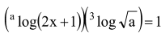

Prediksi Kategori Soal: Logaritma
Gambar Pembahasan yang Direkomendasikan:


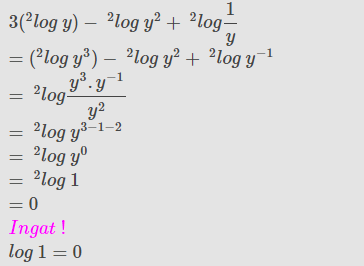

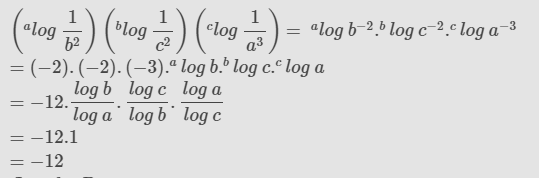

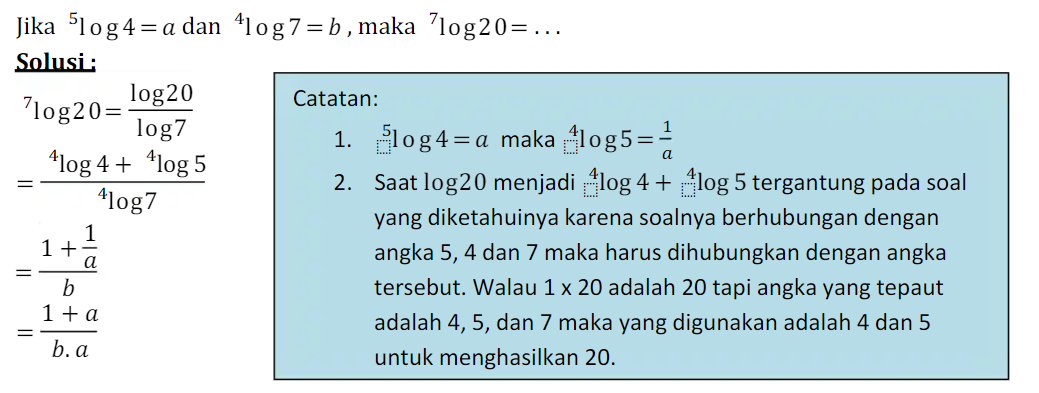

In [59]:
import os
import random
import shutil
from PIL import Image
from IPython.display import display
import cv2

# Path ke direktori dataset pembahasan
dataset_dir = "D:/CAPSTONE/dataset/data_pembahasan/"

# Fungsi untuk mengambil gambar pembahasan berdasarkan kategori soal
def get_recommended_images(category, num_images):
    category_dir = os.path.join(dataset_dir, category)
    image_files = os.listdir(category_dir)
    recommended_images = random.sample(image_files, num_images)
    return [os.path.join(category_dir, image_file) for image_file in recommended_images]

# Fungsi untuk menampilkan gambar pembahasan
def display_recommended_images(image_paths):
    for image_path in image_paths:
        image = Image.open(image_path)
        display(image)

# Fungsi untuk melakukan prediksi kategori soal dari gambar masukan
def scan_soal(image_path):
    # Implementasi pemrosesan gambar untuk melakukan prediksi kategori soal
    # Gunakan model yang telah dilatih sebelumnya untuk memprediksi kategori

    # Contoh implementasi menggunakan model sederhana
    categories = ["Eksponen", "Logaritma", "integral", "spldv", "pertidaksamaan"]
    predicted_category = random.choice(categories)

    # Kembalikan kategori soal yang diprediksi
    return predicted_category

# Fungsi untuk menampilkan hasil prediksi kategori soal dan rekomendasi gambar pembahasan
def predict_and_recommend(image_path, num_images):
    print("Soal:")
    display(Image.open(image_path))

    predicted_category = scan_soal(image_path)
    print("Prediksi Kategori Soal:", predicted_category)

    recommended_images = get_recommended_images(predicted_category, num_images)
    print("Gambar Pembahasan yang Direkomendasikan:")
    display_recommended_images(recommended_images)

# Mendapatkan gambar dari kamera
def capture_image():
    # Menggunakan library OpenCV untuk mengambil gambar dari kamera
    camera = cv2.VideoCapture(0)
    return_value, image = camera.read()
    cv2.imwrite("captured_image.png", image)
    camera.release()

# Contoh penggunaan
capture_image()
image_path = "captured_image.png"
num_images = 10

predict_and_recommend(image_path, num_images)